**HACKATHON 2023**

In [ ]:
from datetime import date
TeamName="Team Banana"
studentName="Randy, Jake, Shreya, Zhiwei, Chunyun, Jessica"
#project=4
contributedPercentage=100
print("Hackaton 2023") 
print("\n"*15)
print("Final Project Code")
print(f'Team name :{TeamName}')
print(f'Members :{studentName}')
print("\n"*15)
print("Northeastern University - Seattle")
print(f'Submission Date: {date.today()}')

# Carbon Emission Web App

In [13]:
#import necessary library
import pandas as pd
import numpy as np
import os
#import seaborn as sns 
import matplotlib.pyplot as plt

In [1]:
import requests
import json 
import osmnx as ox #for accessing map API, make sure to install OSMnx in Conda
import networkx as nxb
import os

## Use OpenSourceMap network

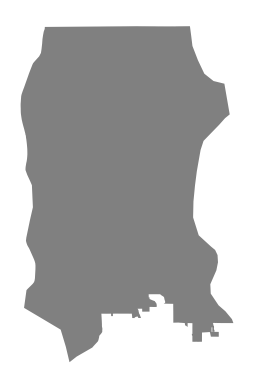

In [6]:
# get the boundary polygon for Seattle, project it, and plot it
city = ox.geocode_to_gdf("Seattle, Washington, USA")
city_proj = ox.project_gdf(city)
ax = city_proj.plot(fc="gray", ec="none")
_ = ax.axis("off")

In [147]:
# get the walking network for Seattle

%time G = ox.graph_from_place("Seattle, Washington, USA", network_type="drive")
G

CPU times: total: 3.36 s
Wall time: 15 s


In [148]:
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)    

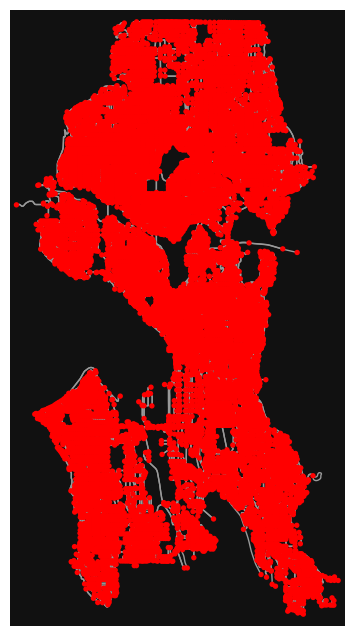

In [149]:
fig, ax = ox.plot_graph(G, node_color="r")

### Get 1000km around NEU only

In [150]:
#from the OSMnx example:

# network from address, including only nodes within 1km along the network from the address
NEU = ox.graph_from_address(
    address="401 Terry Avenue North, Seattle, WA, USA",
    dist=1000,
    dist_type="network",
    network_type="drive",)

In [157]:
# OSM data are sometime incomplete so we use the speed module of osmnx to add missing edge speeds and travel times    G = ox.add_edge_speeds(G)
NEU = ox.speed.add_edge_speeds(NEU)
NEU = ox.add_edge_travel_times(NEU)    
NEU = ox.distance.add_edge_lengths(NEU)

# you can project the network to UTM (zone calculated automatically)
NEU_projected = ox.project_graph(NEU)

In [170]:
# Save graph to disk for future reuse
ox.save_graphml(NEU, "NEU_neighborhood.graphml")
ox.save_graphml(G, "Seattle.graphml")   

#to load presaved graph.
#NEU = ox.load_graphml("NEU_neighborhood.graphml")

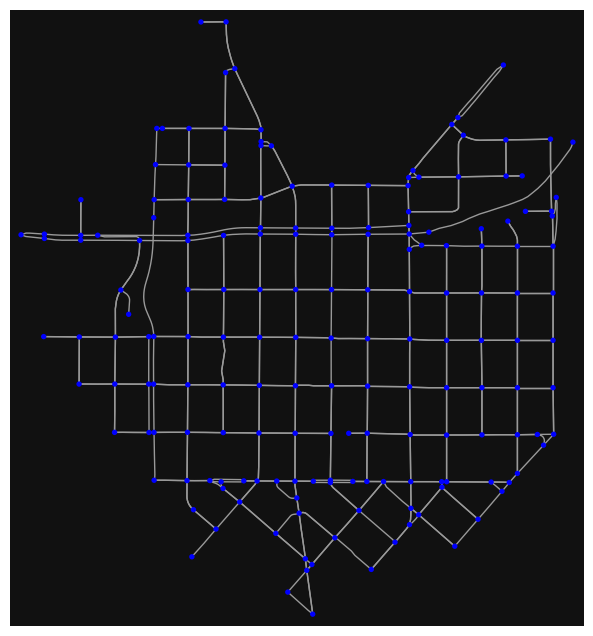

In [152]:
# Plot the graph
fig, ax = ox.plot_graph(NEU, node_color="b")

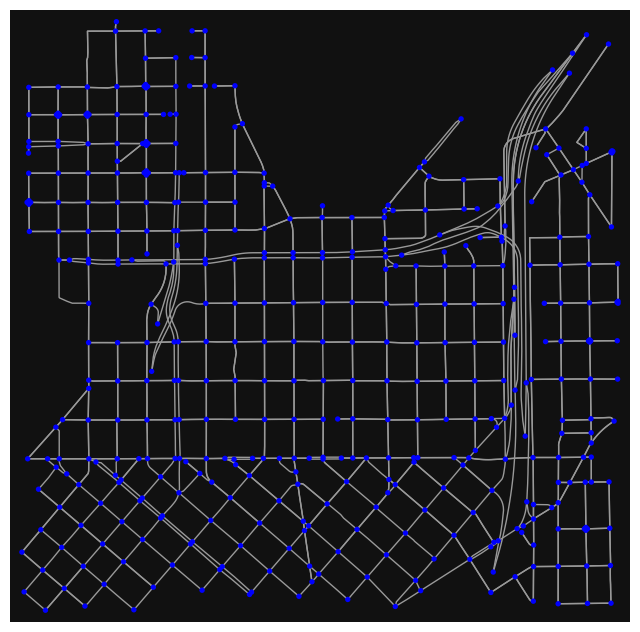

In [138]:
# Plot the graph: NEU PROJECTED, no difference?
fig, ax = ox.plot_graph(NEU_projected, node_color="b")

Now we need to get the distance between two points...

In [10]:
#G = ox.graph_from_place('Seattle, WA , USA', network_type='drive')
stats = ox.basic_stats(G)
print(stats["street_length_avg"])

103.58555945983173


Trying code from here:
https://www.kaggle.com/code/ankasor/driving-distance-using-open-street-maps-data/notebook 

* with some changes since nearest_node function is no longer there

In [ ]:
#Settings for Streetnetwork-Download
STREETGRAPH_FILENAME = 'streetnetwork.graphml'
FORCE_CREATE = False

In [168]:
import osmnx as ox #for accessing map API, make sure to install OSMnx in Conda
import networkx as nx

def driving_distance(area_graph, startpoint, endpoint):
    """
    Calculates the driving distance along an osmnx street network between two coordinate-points.
    The Driving distance is calculated from the closest nodes to the coordinate points.
    This can lead to problems if the coordinates fall outside the area encompassed by the network.
    
    Arguments:
    area_graph -- An osmnx street network
    startpoint -- The Starting point as coordinate Tuple
    endpoint -- The Ending point as coordinate Tuple
    """
    
    #Find nodes closest to the specified Coordinates
    node_origin = ox.distance.nearest_nodes(area_graph, startpoint[1], startpoint[0])
    node_dest = ox.distance.nearest_nodes(area_graph, endpoint[1], endpoint[0])
    
    #Calculate the shortest network distance between the nodes via the edges "length" attribute
            #convert meters to miles: 1 mile = 1609.34 meters
    distance = (nx.shortest_path_length(area_graph, node_origin, node_dest, weight="length"))/1609.34
            
    print("start node: ", node_origin)
    print("destination node: ", node_dest)
    
    return distance

In [169]:
#run the function

startpoint = (47.62302,-122.33734) #northeastern university (401)
endpoint = (47.621, -122.3495) #space needle (approx loc)

print (driving_distance(NEU, startpoint, endpoint), "mile(s)") 
#answer should be 0.7 miles according to google maps

start node:  53071662
destination node:  53198512
0.5644835771185704 mile(s)


## Driving distance with Address as input

In [173]:
pip install geopy

     ---------------------------------------- 0.0/119.8 kB ? eta -:--:--
     --- ------------------------------------ 10.2/119.8 kB ? eta -:--:--
     ------------ ------------------------ 41.0/119.8 kB 667.8 kB/s eta 0:00:01
     -------------------------------------- 119.8/119.8 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [174]:
#try using an address
import geopandas
import geopy

reference: https://towardsdatascience.com/geocode-with-python-161ec1e62b89 


documentation: https://geopy.readthedocs.io/en/stable/index.html#module-geopy.geocoders 

In [184]:
#use Open Source Map Geocoding service: Nominatim
address_start = "401 Terry Avenue North, Seattle, WA, USA"
address_stop = "370 Thomas Street, Seattle, WA, USA"
locator = geopy.geocoders.Nominatim(user_agent="myGeocoder")
    #Nominatim(user_agent="myGeocoder")
loc_start = locator.geocode(address_start)
loc_stop = locator.geocode(address_stop)
loc_start.longitude

-122.3373546

In [185]:
loc_stop.latitude

47.621255

In [187]:
ox.distance.nearest_nodes(NEU, loc_stop.longitude, loc_stop.latitude)

53198512

### Address function

In [194]:
import osmnx as ox #for accessing map API, make sure to install OSMnx in Conda
import networkx as nx
import geopandas
import geopy

def driving_distance_address(area_graph, address_start, address_stop):
    """
    Calculates the driving distance along an osmnx street network between two address (translated to coordinate-points).
    The Driving distance is calculated from the closest nodes to the coordinate points.
    This can lead to problems if the coordinates fall outside the area encompassed by the network.
    
    Arguments:
    area_graph -- An osmnx street network
    address_start -- The Starting point as a string character
    endpoint -- The Ending point as a string character
    """
    #convert address to coordinates
    locator = geopy.geocoders.Nominatim(user_agent="myGeocoder")
    #Nominatim(user_agent="myGeocoder")
    loc_start = locator.geocode(address_start)
    loc_stop = locator.geocode(address_stop)
    loc_start.longitude
    
    
    #Find nodes closest to the specified Coordinates
    node_origin = ox.distance.nearest_nodes(area_graph, loc_start.longitude, loc_start.latitude)
    node_dest = ox.distance.nearest_nodes(area_graph, loc_stop.longitude, loc_stop.latitude)
    
    #Calculate the shortest network distance between the nodes via the edges "length" attribute
            #convert meters to miles: 1 mile = 1609.34 meters
    distance = (nx.shortest_path_length(area_graph, node_origin, node_dest, weight="length"))/1609.34
            
    #print("start node: ", node_origin)
    #print("destination node: ", node_dest)
    
    return distance

In [195]:
#call the function above
address_start = "401 Terry Avenue North, Seattle, WA, USA"
address_stop = "370 Thomas Street, Seattle, WA, USA"

print (driving_distance_address(NEU, address_start, address_stop), "mile(s)") 
#answer should be 0.7 miles according to google maps

0.5644835771185704 mile(s)


In [193]:
driving_distance_address(NEU, address_start, address_stop)

0.5644835771185704

## Drive Carbon Emission Datasets

In [59]:
df_co2 = pd.read_csv('/Users/jtanu/Documents/Northeastern/Hackathon/CO2 Emissions_Canada.csv')
df_co2

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [113]:
#average CO2 emission (gram/KM) converted to (metric ton/miles)
drive_co2 = df_co2.iloc[:,-1].mean() 
drive_co2_conv = drive_co2 * 1e-6 / 0.621371
drive_co2_conv

0.0004032771061308118

In [61]:
df_co2["Fuel Consumption Comb (mpg)"].mean()

27.48165199729181

Scratch notes:

In [89]:
#walking: average Calories (kcal) burn per hour (3.5mph, 155 lbs weight,17 min/mi)
walk_kcal = 133*2
walk_kcal

266

In [114]:
#-0.84 metric ton CO2/acre/year sequestered by 1 acre of US forest per year
(0.84/3600)/drive_co2_conv


0.5785930562040051

In [90]:
#harvard, bicycling 288 calories/30 min at 12-13.9 mph
bike_kcal = 288*2
bike_kcal

576

## Functions calculation

In [105]:
def driving(distance):
    drive_CO2 = 0.0004032771061308118 #metric tons CO2E/mile
    tot_drive_CO2= distance * drive_CO2
    
    avg_mpg = 27.48165199729181 #from CO2 Emissions_Canada.csv
    convert_gal = 31477.8537 #kcal
    E_drive = distance / avg_mpg * convert_gal
    
    banana = 89* (126/100) #1 Banana (126g avg) = 112.14 kcal or Calories (large calorie)
    eq_banana = E_drive/banana
    
    seq = 0.84/3600 #metric tons CO2/acre/day
    forest = seq/tot_drive_CO2
    print("Distance = ", distance, " mile(s)")
    print("Driving CO2 emission = ", tot_drive_CO2, "metric of CO2")
    print("Energy required to drive (gasoline) = ", E_drive, "kcal")
    print("Equivalent Calories of ", round(eq_banana,1), "bananas")
    print("US forest area needed to absorb the CO2 emitted =", round(forest,2), "/acre/day")

In [106]:
driving(1)

Distance =  1  mile(s)
Driving CO2 emission =  0.0004032771061308118 metric of CO2
Energy required to drive (gasoline) =  1145.4134454181285 kcal
Equivalent Calories of  10.2 bananas
US forest area needed to absorb the CO2 emitted = 0.58 /acre/day


In [107]:
def busing(distance):
    bus_CO2 = (0.39) * 0.000453592 #convert lbs/mile to metric tons CO2E/mile
    tot_bus_CO2= distance * bus_CO2
    
    avg_mpg = 26.4 #passanger-mpg, national average for US transit bus
    convert_gal = 31477.8537 #gal to kcal
    E_bus = distance / avg_mpg * convert_gal #kcal energy it took for the travel, per passanger
    
    banana = 89* (126/100) #1 Banana (126g avg) = 112.14 kcal or Calories (large calorie)
    eq_banana = E_bus/banana
    
    seq = 0.84/3600 #metric tons CO2/acre/day
    forest = seq/tot_bus_CO2
    print("Distance = ", distance, " mile(s)")
    print("Driving CO2 emission = ", tot_bus_CO2, "metric of CO2")
    print("Energy required to bus/ passanger = ", E_bus, "kcal")
    print("Equivalent Calories of ", round(eq_banana,1), "bananas")
    print("US forest area needed to absorb the CO2 emitted =", round(forest,2), "/acre/day")

In [108]:
busing(1)

Distance =  1  mile(s)
Driving CO2 emission =  0.00017690088 metric of CO2
Energy required to bus/ passanger =  1192.342943181818 kcal
Equivalent Calories of  10.6 bananas
US forest area needed to absorb the CO2 emitted = 1.32 /acre/day


In [91]:
def walking(distance):
    walk_mph = 3.5
    walk_kcal = 133*2 #per hour
    E_walk = (distance/walk_mph)*walk_kcal
    
    banana = 89* (126/100) #1 Banana (126g avg) = 112.14 kcal or Calories (large calorie)
    eq_banana = walk_kcal/banana
    print("Distance = ", distance, " mile(s)")
    print("Walking CO2 emission = 0 metric of CO2")
    print("Energy required to walk = ", E_walk, "kcal")
    print("Equivalent Energy in # of bananas =", round(eq_banana,1), "bananas")

In [92]:
walking(1)

Distance =  1  mile(s)
Walking CO2 emission = 0 metric of CO2
Energy required to walk =  76.0 kcal
Equivalent Energy in # of bananas = 2.4 bananas


In [95]:
def biking(distance):
    bike_mph = 12
    bike_kcal = 288*2 #per hour
    E_bike = (distance/bike_mph)*bike_kcal
    
    banana = 89* (126/100) #1 Banana (126g avg) = 112.14 kcal or Calories (large calorie)
    eq_banana = bike_kcal/banana
    print("Distance = ", distance, " mile(s)")
    print("Walking CO2 emission = 0 metric of CO2")
    print("Energy required to walk = ", E_bike, "kcal")
    print("Equivalent Energy in # of bananas =", round(eq_banana,1), "bananas")

In [96]:
biking(1)

Distance =  1  mile(s)
Walking CO2 emission = 0 metric of CO2
Energy required to walk =  48.0 kcal
Equivalent Energy in # of bananas = 5.1 bananas


# References

* Banana https://fdc.nal.usda.gov/fdc-app.html#/food-details/1102653/nutrients
* NOT USED: wALKING https://www.mayoclinic.org/healthy-lifestyle/weight-loss/in-depth/exercise/art-20050999 
* car CO2 emission: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles (same number as EPA green house gases page below)
* bus CO2 emission: https://www.cbo.gov/system/files/2022-12/58566-co2-emissions-transportation.pdf 
* transit bus national average: https://afdc.energy.gov/conserve/public_transportation.html
* fitbit dataset: https://www.kaggle.com/datasets/tanisha1416/my-redmi-fuel-band-record-tracker-fitbit-dataset (compilation of these original open source data: https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6) * EPA greenhouse gases equivalence: https://www.epa.gov/energy/greenhouse-gases-equivalencies-calculator-calculations-and-references 
* 1 gallon to kcal = 31477.8537 kcal : https://www.convertunits.com/from/gallon/to/kcal
* bicycling, walking, etc https://www.health.harvard.edu/diet-and-weight-loss/calories-burned-in-30-minutes-for-people-of-three-different-weights 